# Data Wrangling Project

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

*The goal of this project is to wrangle data from WeRateDogs Twitter's account using Python and document the whole process in a Jupyter Notebook named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations.*

## Project Details Summary

The aim of the project is to :
 
 #### Gather Data
 - From three different sources:- 
    - The WeRateDogs Twitter archive ( Downloaded this file manually and loaded it)
    - The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and will be downloaded programmatically using the Requests library and the following URL: *https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv*
    - Querying the twitter API using Tweepy library to get basic data such as retweet count, favorite count, etc.
 
 
 #### Assess Data 
 - For a minumum of
    - 8 Quality issues
    - 2 Tidiness issues
 
 
 #### Clean Data 
   - According to the goals set in the *Assess Data* step

## Key Points

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

- Cleaning includes merging individual pieces of data according to the rules of tidy data.

- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

## Assessing Data for this Project

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

## Cleaning Data for this Project

Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.



## Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook.

At least three (3) insights and one (1) visualization must be produced.

## Reporting for this Project

Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import glob
from io import BytesIO
import time

# 1. Gathering Data

## 1.1. WeRateDogs Twitter Archive Enhanced Data

In [3]:
twitter_enhanced_df=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_enhanced_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##  1.2. Image Predictions Dataset

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(url.split("/",)[-1], mode="wb") as file:
    file.write(response.content)

In [6]:
image_predictions_df=pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True
1091,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True
1418,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False
199,669661792646373376,https://pbs.twimg.com/media/CUsd2TfWwAAmdjb.jpg,1,weasel,0.262802,False,Siamese_cat,0.148263,False,hamster,0.116374,False
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,True,miniature_pinscher,0.233180,True,Gordon_setter,0.093582,True
1441,775085132600442880,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True


## 1.3. Twitter API Data

In [9]:
import tweepy

consumer_key = '5Cot2xpCvsOp9Dk96nm2MdD5l'
consumer_secret = 'J5I6tLEHbFzfvEcID2aV9hFAgqqgkAJdtgQDf7nxgpHyxP0snV'
access_token = '2485468778-E2FXTHoLlrXZvNPx0B5bPxm4vVlKAcc0bdVxaQ7'
access_secret = 'v9avWCTsH6Gy5lWOXSG4UBmUjgq7WdXvhUlwCpLAnpkoS'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [10]:
try:
    api.verify_credentials()
    print('Auth Ok')
except:
    print('error')

Auth Ok


In [11]:
tweet_ids=image_predictions_df['tweet_id']

In [12]:
api_data=[]
tweets_error_list=[]

start=time.time()

for tweet in tweet_ids:
    try:
        tweets = api.get_status(tweet, tweet_mode= 'extended') 
        tweet_id=tweets.id
        favorite_count=tweets.favorite_count
        retweet_count=tweets.retweet_count
        followers_count=tweets.user.followers_count
        created_time=tweets.user.created_at
        
        
        api_data.append(
            {'id':int(tweet_id), 
            'favorites': int(favorite_count),
            'retweets':int(retweet_count),
            'user_followers':int(followers_count),
            'date_time': pd.to_datetime(created_time)})
    
    except Exception as e:
        print(str(tweets.id)+ " _ " + str(e))
        tweets_error_list.append(tweets.id)
        

end=time.time()
gap=end-start
print('Total time for execution is' + str(gap))

679877062409191424 _ [{'code': 144, 'message': 'No status found with that ID.'}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877217865730 _ [{'message': 'Rate limit exceeded', 'code': 88}]
699788877

In [15]:
api_data_df=pd.DataFrame(api_data, columns=['id','favorites','retweets','user_followers','date_time'])

In [16]:
api_data_df.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [17]:
df_api_data.head()

,id,favorites,retweets,user_followers,date_time
0,666020888022790149,2412,462,8784472,2015-11-15 21:41:29
1,666029285002620928,121,42,8784472,2015-11-15 21:41:29
2,666033412701032449,112,41,8784472,2015-11-15 21:41:29
3,666044226329800704,271,132,8784471,2015-11-15 21:41:29
4,666049248165822465,96,39,8784471,2015-11-15 21:41:29


In [18]:
df_api_data.tail()

,id,favorites,retweets,user_followers,date_time
1953,891327558926688256,37710,8480,8784710,2015-11-15 21:41:29
1954,891689557279858688,39477,7862,8785387,2015-11-15 21:41:29
1955,891815181378084864,23501,3777,8784711,2015-11-15 21:41:29
1956,892177421306343426,31217,5697,8784711,2015-11-15 21:41:29
1957,892420643555336193,36187,7703,8784712,2015-11-15 21:41:29


# Gathering Data Ends

The three data frames have been collected:

- <font color=blue> *twitter_enhanced_df* </font>: Downloaded and saved locally 
- <font color=blue> *image_predictions_df* </font> : Downloaded via the internet and read in as a TSV file
- <font color=blue> *api_data_df* </font> : Acessed from Twitter's API using *tweepy*

# 2. Assessing Data 

In [19]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
twitter_enhanced_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
twitter_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
twitter_enhanced_df[twitter_enhanced_df['expanded_urls'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [23]:
twitter_enhanced_df[twitter_enhanced_df['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [24]:
twitter_enhanced_df[twitter_enhanced_df['rating_denominator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [25]:
twitter_enhanced_df[twitter_enhanced_df['rating_numerator']>50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [26]:
twitter_enhanced_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2193,668902994700836864,NaN,NaN,2015-11-23 21:24:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lambeau. He's a Whistling Haiku from the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668902994...,11,10,Lambeau,None,None,None,None
2072,671109016219725825,NaN,NaN,2015-11-29 23:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671109016...,8,10,Toby,None,None,None,None
914,757393109802180609,NaN,NaN,2016-07-25 01:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo completely oblivious to the dou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757393109...,10,10,None,doggo,None,None,None
1523,690607260360429569,6.903413e+17,467036706.0,2016-01-22 18:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 @LightningHoltt,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
704,785872687017132033,NaN,NaN,2016-10-11 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. He appears to be rather h*ckin flu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785872687...,12,10,Rusty,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11,10,None,None,None,None,None
1169,720785406564900865,NaN,NaN,2016-04-15 01:26:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He hears everything you say. D...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720785406...,12,10,Archie,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None


In [27]:
twitter_enhanced_df[twitter_enhanced_df['name'].str.isupper()==1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [28]:
names=twitter_enhanced_df['name'].str.strip()
name_series=[]
for name in names:
    if (name[0].isupper()==0):
        name_series.append(name)
        #print(twitter_enhanced_df[twitter_enhanced_df['name']==name])

In [29]:
name_series

['such',
 'a',
 'quite',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'mad',
 'an',
 'very',
 'a',
 'very',
 'just',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [30]:
twitter_enhanced_df[twitter_enhanced_df['name']=='None']#.info()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [31]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1958 non-null   int64 
 1   favorites       1958 non-null   int64 
 2   retweets        1958 non-null   int64 
 3   user_followers  1958 non-null   int64 
 4   date_time       1958 non-null   object
dtypes: int64(4), object(1)
memory usage: 76.6+ KB


In [34]:
df_api_data.head()

,id,favorites,retweets,user_followers,date_time
0,666020888022790149,2412,462,8784472,2015-11-15 21:41:29
1,666029285002620928,121,42,8784472,2015-11-15 21:41:29
2,666033412701032449,112,41,8784472,2015-11-15 21:41:29
3,666044226329800704,271,132,8784471,2015-11-15 21:41:29
4,666049248165822465,96,39,8784471,2015-11-15 21:41:29


In [35]:
df_api_data.describe()

,id,favorites,retweets,user_followers
count,1.958000e+03,1958.000000,1958.000000,1.958000e+03
mean,7.359952e+17,7808.041369,2563.236977,8.784587e+06
std,6.684090e+16,12131.101531,4582.143511,9.898543e+01
min,6.660209e+17,0.000000,11.000000,8.784471e+06
25%,6.755247e+17,1438.750000,539.250000,8.784514e+06
50%,7.113353e+17,3457.500000,1204.000000,8.784572e+06
75%,7.881713e+17,9421.500000,2871.000000,8.784647e+06
max,8.924206e+17,156222.000000,77786.000000,8.785387e+06


**Quality Issues**

- <font color=red> *twitter_enhanced_df* </font>: 

    - Some rows in *rating_denominator* have a rating of more than 10 and some with less than 10
    - Some rows in *rating_numerator* have an extremely high rating
    - Datatype of *timestamp* *retweeted_status_timestamp* is object instead of datetime 
    - Erraneous values in *name* ('a', 'an', 'O', 'JD' etc)
    - *expanded_urls* has "NaN" valued rows
    - *name* contains "None" values
    - Unwanted columns (*retweeted_status_id* , *retweeted_status_user_id*, *retweeted_status_timestamp*)

    
    

- <font color=red> *image_predictions_df* </font> :

    - p1, p2 and p3 should be categoral datatype
    - p1_conf, p2_conf and p3_conf columns should be merged
    - p1_dog, p2_dog and p3_dog columns should be merged
    
    

- <font color=red> *api_data_df* </font> : 
    
    - Datatype of *date_time* is object instead of datetime




**Tidiness Issues**

- 4 columns present for each stage in dog's life (*doggo*, *pupper*, *puppo*, *floofer*)
- No need for three dataframes. Can be combined into one




# Assessing Data Ends

# 3. Cleaning Data

In [56]:
twitter_enhanced_df_clean=twitter_enhanced_df.copy()
image_predictions_df_clean=image_predictions_df.copy()
api_data_df_clean=api_data_df.copy()

## 3.1. Tidiness Issues

### Define

<font color=red> *twitter_enhanced_df* </font>:
Multiple dataframes present

<font color=green>Action</font>: Merge into one dataframe 

### Code

In [57]:
twitter_enhanced_df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [58]:
twitter_enhanced_df_clean = pd.merge(left=twitter_enhanced_df_clean,
                                 right=api_data_df_clean,  left_on='tweet_id', right_on='id', how='inner')

In [59]:
twitter_enhanced_df_clean = twitter_enhanced_df_clean.merge(image_predictions_df_clean, on='tweet_id', how='inner')


### Test

In [60]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1957
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1958 non-null   int64         
 1   in_reply_to_status_id       21 non-null     float64       
 2   in_reply_to_user_id         21 non-null     float64       
 3   timestamp                   1958 non-null   object        
 4   source                      1958 non-null   object        
 5   text                        1958 non-null   object        
 6   retweeted_status_id         69 non-null     float64       
 7   retweeted_status_user_id    69 non-null     float64       
 8   retweeted_status_timestamp  69 non-null     object        
 9   expanded_urls               1958 non-null   object        
 10  rating_numerator            1958 non-null   int64         
 11  rating_denominator          1958 non-null   int64       

### Define

<font color=red> *twitter_enhanced_df* </font>:
Multiple columns present for p1, p2, p3

<font color=green>Action</font>: Apply logic and remove unwanted columns

### Code

In [61]:
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

twitter_enhanced_df_clean.apply(get_prediction_confidence, axis=1)
twitter_enhanced_df_clean['prediction'] = prediction
twitter_enhanced_df_clean['confidence'] = confidence

In [62]:
twitter_enhanced_df_clean = twitter_enhanced_df_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

## Test

In [63]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1957
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1958 non-null   int64         
 1   in_reply_to_status_id       21 non-null     float64       
 2   in_reply_to_user_id         21 non-null     float64       
 3   timestamp                   1958 non-null   object        
 4   source                      1958 non-null   object        
 5   text                        1958 non-null   object        
 6   retweeted_status_id         69 non-null     float64       
 7   retweeted_status_user_id    69 non-null     float64       
 8   retweeted_status_timestamp  69 non-null     object        
 9   expanded_urls               1958 non-null   object        
 10  rating_numerator            1958 non-null   int64         
 11  rating_denominator          1958 non-null   int64       

### Define

<font color=red> *twitter_enhanced_df* </font>:
Multiple columns for dog stage

<font color=green>Action</font>: Remove these columns and add only one column *dog_life_stage*

### Code

In [64]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in twitter_enhanced_df_clean.columns.tolist() if x not in melt_columns]

# Melt the the columns into values
twitter_enhanced_df_clean = pd.melt(twitter_enhanced_df_clean, id_vars = stay_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'dog_life_stage')

In [65]:
twitter_enhanced_df_clean = twitter_enhanced_df_clean.drop('stages', 1)

### Test

In [66]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7832 entries, 0 to 7831
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    7832 non-null   int64         
 1   in_reply_to_status_id       84 non-null     float64       
 2   in_reply_to_user_id         84 non-null     float64       
 3   timestamp                   7832 non-null   object        
 4   source                      7832 non-null   object        
 5   text                        7832 non-null   object        
 6   retweeted_status_id         276 non-null    float64       
 7   retweeted_status_user_id    276 non-null    float64       
 8   retweeted_status_timestamp  276 non-null    object        
 9   expanded_urls               7832 non-null   object        
 10  rating_numerator            7832 non-null   int64         
 11  rating_denominator          7832 non-null   int64       

## Define

<font color=red> *twitter_enhanced_df* </font> : no gender column

<font color=green>Action</font>: Add gender columns

## Code

In [67]:
male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in twitter_enhanced_df_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
twitter_enhanced_df_clean['dog_gender'] = gender

## Test

In [68]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7832 entries, 0 to 7831
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    7832 non-null   int64         
 1   in_reply_to_status_id       84 non-null     float64       
 2   in_reply_to_user_id         84 non-null     float64       
 3   timestamp                   7832 non-null   object        
 4   source                      7832 non-null   object        
 5   text                        7832 non-null   object        
 6   retweeted_status_id         276 non-null    float64       
 7   retweeted_status_user_id    276 non-null    float64       
 8   retweeted_status_timestamp  276 non-null    object        
 9   expanded_urls               7832 non-null   object        
 10  rating_numerator            7832 non-null   int64         
 11  rating_denominator          7832 non-null   int64       

In [69]:
twitter_enhanced_df_clean['dog_gender']

0          NaN
1       female
2         male
3       female
4         male
         ...  
7827       NaN
7828      male
7829       NaN
7830       NaN
7831       NaN
Name: dog_gender, Length: 7832, dtype: object

## 3.2. Quality Issues

### Define

<font color=red> *twitter_enhanced_df* </font>:
Duplicate rows due to pd.melt and retweet rows

<font color=green>Action</font>: Remove these rows

### Code

In [70]:
twitter_enhanced_df_clean['retweeted_status_id'].value_counts()

7.076109e+17    4
8.305833e+17    4
8.222448e+17    4
7.128090e+17    4
7.939622e+17    4
               ..
7.735476e+17    4
7.652221e+17    4
8.190064e+17    4
6.853251e+17    4
7.331095e+17    4
Name: retweeted_status_id, Length: 69, dtype: int64

In [71]:
twitter_enhanced_df_clean = twitter_enhanced_df_clean[pd.isnull(twitter_enhanced_df_clean.retweeted_status_id)]

In [72]:
twitter_enhanced_df_clean = twitter_enhanced_df_clean.drop('retweeted_status_id', axis=1)
twitter_enhanced_df_clean = twitter_enhanced_df_clean.drop('retweeted_status_user_id', axis=1)
twitter_enhanced_df_clean = twitter_enhanced_df_clean.drop('retweeted_status_timestamp', axis=1)
twitter_enhanced_df_clean = twitter_enhanced_df_clean.drop('date_time', axis=1) 

In [73]:
twitter_enhanced_df_clean = twitter_enhanced_df_clean.drop_duplicates()

In [75]:
twitter_enhanced_df_clean = twitter_enhanced_df_clean.sort_values('dog_life_stage').drop_duplicates('tweet_id', keep = 'last')

### Test

In [76]:
twitter_enhanced_df_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 6700
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1889 non-null   int64  
 1   in_reply_to_status_id  21 non-null     float64
 2   in_reply_to_user_id    21 non-null     float64
 3   timestamp              1889 non-null   object 
 4   source                 1889 non-null   object 
 5   text                   1889 non-null   object 
 6   expanded_urls          1889 non-null   object 
 7   rating_numerator       1889 non-null   int64  
 8   rating_denominator     1889 non-null   int64  
 9   name                   1889 non-null   object 
 10  id                     1889 non-null   int64  
 11  favorites              1889 non-null   int64  
 12  retweets               1889 non-null   int64  
 13  user_followers         1889 non-null   int64  
 14  jpg_url                1889 non-null   object 
 15  pred

### Define

<font color=red> *twitter_enhanced_df* </font> : Datatype of *timestamp* and *retweeted_status_timestamp* is object instead of datetime

<font color=green>Action</font>: Change datatypes to datetime

### Code

In [77]:
twitter_enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 6700
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1889 non-null   int64  
 1   in_reply_to_status_id  21 non-null     float64
 2   in_reply_to_user_id    21 non-null     float64
 3   timestamp              1889 non-null   object 
 4   source                 1889 non-null   object 
 5   text                   1889 non-null   object 
 6   expanded_urls          1889 non-null   object 
 7   rating_numerator       1889 non-null   int64  
 8   rating_denominator     1889 non-null   int64  
 9   name                   1889 non-null   object 
 10  id                     1889 non-null   int64  
 11  favorites              1889 non-null   int64  
 12  retweets               1889 non-null   int64  
 13  user_followers         1889 non-null   int64  
 14  jpg_url                1889 non-null   object 
 15  pred

In [78]:
twitter_enhanced_df_clean['timestamp'].head(15)

0       2017-08-01 16:23:56 +0000
1381    2015-12-20 20:38:24 +0000
1380    2015-12-21 00:53:29 +0000
1379    2015-12-21 01:53:54 +0000
1378    2015-12-21 02:30:45 +0000
1377    2015-12-21 02:41:11 +0000
1376    2015-12-21 03:12:08 +0000
1375    2015-12-21 04:44:55 +0000
1373    2015-12-21 16:04:13 +0000
1372    2015-12-21 17:33:48 +0000
1371    2015-12-21 21:15:11 +0000
1370    2015-12-21 22:15:18 +0000
1382    2015-12-20 18:29:43 +0000
1369    2015-12-22 01:28:25 +0000
1367    2015-12-22 03:57:37 +0000
Name: timestamp, dtype: object

In [79]:
twitter_enhanced_df_clean['timestamp']=  pd.to_datetime(twitter_enhanced_df_clean['timestamp'])

### Test

In [82]:
twitter_enhanced_df_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1381   2015-12-20 20:38:24+00:00
1380   2015-12-21 00:53:29+00:00
1379   2015-12-21 01:53:54+00:00
1378   2015-12-21 02:30:45+00:00
                  ...           
5937   2017-06-25 00:45:22+00:00
5888   2017-07-24 17:02:04+00:00
5886   2017-07-25 01:55:32+00:00
6164   2017-01-13 17:00:21+00:00
6700   2016-06-03 01:07:16+00:00
Name: timestamp, Length: 1889, dtype: datetime64[ns, UTC]

### Define

<font color=red> *twitter_enhanced_df* </font> : Erraneous values in *name* ('a', 'an', 'O', 'JD' etc)

<font color=green>Action</font>: Remove such rows

### Code

In [85]:
twitter_enhanced_df_clean['name']

0       Phineas
1381       None
1380      Tango
1379       Dash
1378     Wilson
         ...   
5937     Snoopy
5888     Stuart
5886       None
6164     Oliver
6700     Bayley
Name: name, Length: 1889, dtype: object

In [86]:
names=twitter_enhanced_df_clean['name'].str.strip()
name_series=[]
for name in names:
    if (name[0].isupper()==0):
        name_series.append(name)
        #print(twitter_enhanced_df[twitter_enhanced_df['name']==name])

name_series

['officially',
 'a',
 'a',
 'actually',
 'by',
 'a',
 'a',
 'a',
 'the',
 'a',
 'a',
 'a',
 'getting',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'quite',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'the',
 'the',
 'just',
 'light',
 'the',
 'a',
 'space',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'incredibly',
 'a',
 'such',
 'one',
 'quite',
 'quite',
 'unacceptable',
 'this',
 'getting',
 'very',
 'infuriating',
 'a',
 'a',
 'a',
 'very',
 'my',
 'very',
 'not',
 'an',
 'one',
 'a',
 'a',
 'a',
 'one',
 'his',
 'the',
 'one',
 'the',
 'a',
 'just',
 'a',
 'just',
 'all']

In [87]:
twitter_enhanced_df_clean['name']=twitter_enhanced_df_clean[twitter_enhanced_df_clean['name'].str[0].str.isupper()]

### Test

In [88]:
sum(twitter_enhanced_df_clean['name'].isin(name_series))

0

### Define

<font color=red> *twitter_enhanced_df* </font> : expanded_urls* has "NaN" valued rows

<font color=green>Action</font>: Remove these rows**

### Code

In [89]:
twitter_enhanced_df_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1381    https://twitter.com/dog_rates/status/678675843...
1380    https://twitter.com/dog_rates/status/678740035...
1379    https://twitter.com/dog_rates/status/678755239...
1378    https://twitter.com/dog_rates/status/678764513...
                              ...                        
5937    https://twitter.com/dog_rates/status/878776093...
5888    https://twitter.com/dog_rates/status/889531135...
5886    https://twitter.com/dog_rates/status/889665388...
6164    https://www.gofundme.com/servicedogoliver,http...
6700    https://twitter.com/dog_rates/status/738537504...
Name: expanded_urls, Length: 1889, dtype: object

In [90]:
temp_df=twitter_enhanced_df_clean[twitter_enhanced_df_clean['expanded_urls'].isnull()]

In [91]:
twitter_enhanced_df_clean.drop(temp_df.index, inplace=True)

In [92]:
twitter_enhanced_df_clean.reset_index()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,id,favorites,retweets,user_followers,jpg_url,prediction,confidence,dog_life_stage,dog_gender
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,8.92421e+17,892420643555336193,36187,7703,8784712,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,None,NaN
1,1381,678675843183484930,NaN,NaN,2015-12-20 20:38:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,https://twitter.com/dog_rates/status/678675843...,2,10,6.78676e+17,678675843183484930,2827,1439,8784527,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,NaN,0.000000,None,NaN
2,1380,678740035362037760,NaN,NaN,2015-12-21 00:53:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,https://twitter.com/dog_rates/status/678740035...,6,10,6.7874e+17,678740035362037760,3717,1657,8784527,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,beagle,0.022525,None,NaN
3,1379,678755239630127104,NaN,NaN,2015-12-21 01:53:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dash. He didn't think the water would ...,https://twitter.com/dog_rates/status/678755239...,10,10,6.78755e+17,678755239630127104,7037,3231,8784527,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,malamute,0.606654,None,male
4,1378,678764513869611008,NaN,NaN,2015-12-21 02:30:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,https://twitter.com/dog_rates/status/678764513...,10,10,6.78765e+17,678764513869611008,1617,468,8784526,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,Irish_terrier,0.696646,None,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,5937,878776093423087618,NaN,NaN,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,8.78776e+17,878776093423087618,18174,3737,8784704,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,Italian_greyhound,0.734684,puppo,NaN
1885,5888,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,8.89531e+17,889531135344209921,14194,2056,8784710,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,puppo,male
1886,5886,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,8.89665e+17,889665388333682689,45051,9117,8784710,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,puppo,NaN
1887,6164,819952236453363712,NaN,NaN,2017-01-13 17:00:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",13,10,8.19952e+17,819952236453363712,5402,1194,8784661,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,American_Staffordshire_terrier,0.925505,puppo,male


### Test

In [93]:
twitter_enhanced_df_clean[twitter_enhanced_df_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,id,favorites,retweets,user_followers,jpg_url,prediction,confidence,dog_life_stage,dog_gender


### Define

<font color=red> *twitter_enhanced_df* </font> : *name* contains "None" values

<font color=green>Action</font>: Convert "None" to "NaN"

### Code

In [94]:
twitter_enhanced_df_clean['name'].replace(to_replace=[None], value=np.nan, inplace=True)

### Test

In [95]:
sum(twitter_enhanced_df_clean['name']=="None")

C:\Users\rithw\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

### Define

<font color=red> *twitter_enhanced_df* </font> : *rating_numerator* contains decimal values

<font color=green>Action</font>: Fix the ratings

### Code

In [98]:
pd.set_option('display.max_colwidth', -1)

C:\Users\rithw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [100]:
twitter_enhanced_df_clean[twitter_enhanced_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator',
                                                                                            'tweet_id']]

C:\Users\rithw\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,tweet_id
1337,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,680494726643068929
498,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,786709082849828864
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,883482846933004288
4469,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,778027034220126208


In [104]:
twitter_enhanced_df_clean.loc[(twitter_enhanced_df_clean['tweet_id'] == 680494726643068929) 
                              & (twitter_enhanced_df_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [105]:
twitter_enhanced_df_clean.loc[(twitter_enhanced_df_clean['tweet_id'] == 786709082849828864) 
                              & (twitter_enhanced_df_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75

In [106]:
twitter_enhanced_df_clean.loc[(twitter_enhanced_df_clean['tweet_id'] == 883482846933004288) 
                              & (twitter_enhanced_df_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5

In [107]:
twitter_enhanced_df_clean.loc[(twitter_enhanced_df_clean['tweet_id'] == 778027034220126208) 
                              & (twitter_enhanced_df_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27

### Test

In [108]:
twitter_enhanced_df_clean[twitter_enhanced_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator',
                                                                                            'tweet_id']]

C:\Users\rithw\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,tweet_id
1337,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,680494726643068929
498,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,786709082849828864
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,883482846933004288
4469,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,778027034220126208


# Cleaning Data Ends

# Storing Data to csv

In [117]:
twitter_enhanced_df_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [118]:
twitter_enhanced_df_clean=pd.read_csv('twitter_archive_master.csv')

# Visualizing Data

In [119]:
% matplotlib inline
import seaborn as sns

UsageError: Line magic function `%` not found.


### Correlation between retweets and favorites

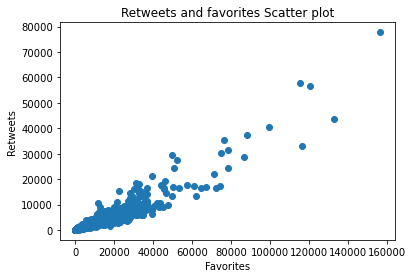

In [120]:
plt.scatter(twitter_enhanced_df_clean['favorites'], twitter_enhanced_df_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');

A positive correlation exists between retweets and favorites(likes)

## Which dog stage gets most tweets?

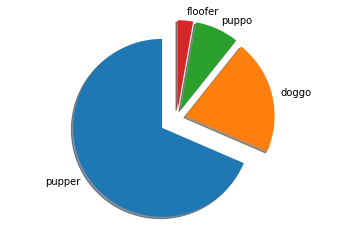

In [121]:
life_stage_count = list(twitter_enhanced_df_clean[twitter_enhanced_df_clean['dog_life_stage'] != 'None']['dog_life_stage'].value_counts())[0:4]
life_stages = twitter_enhanced_df_clean[twitter_enhanced_df_clean['dog_life_stage'] != 'None']['dog_life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal');

Pupper stage fetches more tweets from people while floofer fetches the least

In [122]:
stwitter_enhanced_df_clean['dog_gender'].value_counts()

male      611
female    212
Name: dog_gender, dtype: int64

Out of the ones identified, Male dogs are the far greater in number than female dogs